In [1]:
import networkit as nk

In [2]:
import networkit.external as external

In [3]:
def genLFR(n, mu):
    lfr = nk.generators.LFRGenerator(n)
    lfr.generatePowerlawDegreeSequence(20, 50, -2)
    lfr.generatePowerlawCommunitySizeSequence(20, 100, -1)
    lfr.setMu(mu)
    lfr.run()
    return (lfr.getGraph(), lfr.getPartition())

In [4]:
mus = [i/10 for i in range(1, 10)] 

In [14]:
arisLouvain = []
arisInfomap = []

for mu in mus:
    gLfr, pLfr = genLFR(5000, mu)
    
    pLouvain = nk.community.PLM(gLfr, par="none randomized", recurse=False).run().getPartition()
    arisLouvain.append(1.0 - nk.community.AdjustedRandMeasure().getDissimilarity(gLfr, pLfr, pLouvain))
    
    pInfomap = external.clusterInfomap(gLfr)
    arisInfomap.append(1.0 - nk.community.AdjustedRandMeasure().getDissimilarity(gLfr, pLfr, pInfomap))

read communities from: /home/tmp/tmptuw93bz5/network.clu
read communities from: /home/tmp/tmpkvd3fcz8/network.clu
read communities from: /home/tmp/tmphad7ekbs/network.clu
read communities from: /home/tmp/tmpqcr__nt0/network.clu
read communities from: /home/tmp/tmpkwrt38ns/network.clu
read communities from: /home/tmp/tmpwrlkxtsm/network.clu
read communities from: /home/tmp/tmpl0iae37s/network.clu
read communities from: /home/tmp/tmpxs0jcayv/network.clu
read communities from: /home/tmp/tmpqi4aj29t/network.clu


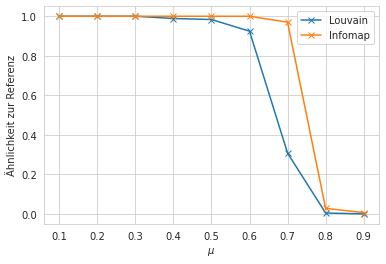

In [15]:
fig, ax = plt.subplots()
ax.plot(mus, arisLouvain, "x-", label="Louvain")
ax.plot(mus, arisInfomap, "x-", label="Infomap")
ax.set_xlabel("$\mu$")
ax.set_ylabel("Ähnlichkeit zur Referenz")
ax.legend()

In [13]:
?nk.community.PLM